Import libraries and load data using Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import datetime
from matplotlib.pyplot import figure


aq_data = pd.read_excel("AirQualityUCI.xlsx")

In [2]:
# display data through DataFrame

aq_data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


1. The data contains ambiguous units
1. The values in CO(GT) and PT08.S1(CO) differ greatly as columns to be compared
2. Similarly other comparison columns also differ greatly in value
3. There are negative values in NMHC(GT)
4. Relative humidity is readable as a % while absolute humidity is ambiguous in units

In [3]:
# summary statistics of data

aq_data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


1. Notice the min row shows -200.00 across all columns
2. The mean in columns CO(GT), NMHC(GT), and AH are negative
3. The NMHC(GT) column describes negative values at the min, 25th Percentile, 50th Percentile, & 75th Percentile

In [4]:
# Show column names

# For loop through aq_data
for col in aq_data.columns:
    print(col)
    
# Alternatively:

# Use the -- list function -- instead of for loop
# list(aq_data.columns)

Date
Time
CO(GT)
PT08.S1(CO)
NMHC(GT)
C6H6(GT)
PT08.S2(NMHC)
NOx(GT)
PT08.S3(NOx)
NO2(GT)
PT08.S4(NO2)
PT08.S5(O3)
T
RH
AH


In [5]:
# Rename Column names for readability

aq_data = aq_data.rename(columns={'CO(GT)'       :'Carbon Monoxide (Reference)', 
                                  'PT08.S1(CO)'  :'Carbon Monoxide (Sensor 1)',
                                  'NMHC(GT)'     :'Non Metanic HydroCarbons (Reference)',
                                  'C6H6(GT)'     :'Benzene (Reference)',
                                  'PT08.S2(NMHC)':'Non Metanic HydroCarbons (Sensor 2)',
                                  'NOx(GT)'      :'Nitrogen Oxides (Reference)',
                                  'PT08.S3(NOx)' :'Nitrogen Oxides (Sensor 3)',
                                  'NO2(GT)'      :'Nitrogen Dioxide (Reference)',
                                  'PT08.S4(NO2)' :'Nitrogen Dioxide (Sensor 4)',
                                  'PT08.S5(O3)'  :'Ozone (Trioxygen) (Sensor 5)',
                                  'T'            :'Temperature (Celsius)',
                                  'RH'           :'Relative Humidity (%)',
                                  'AH'           :'Absolute Humidity'                                  
                                 })

In [6]:
# DataFrame with renamed columns
aq_data.head()

,Date,Time,Carbon Monoxide (Reference),Carbon Monoxide (Sensor 1),Non Metanic HydroCarbons (Reference),Benzene (Reference),Non Metanic HydroCarbons (Sensor 2),Nitrogen Oxides (Reference),Nitrogen Oxides (Sensor 3),Nitrogen Dioxide (Reference),Nitrogen Dioxide (Sensor 4),Ozone (Trioxygen) (Sensor 5),Temperature (Celsius),Relative Humidity (%),Absolute Humidity
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [7]:
# Group aq_data by date and average readings on the date

df_avg = aq_data.groupby("Date").agg({"Carbon Monoxide (Reference)"         :"mean",
                                      "Carbon Monoxide (Sensor 1)"          :"mean",
                                      "Non Metanic HydroCarbons (Reference)":"mean",
                                      "Benzene (Reference)"                 :"mean",
                                      "Non Metanic HydroCarbons (Sensor 2)" :"mean",
                                      "Nitrogen Oxides (Reference)"         :"mean",
                                      "Nitrogen Oxides (Sensor 3)"          :"mean",
                                      "Nitrogen Dioxide (Reference)"        :"mean",
                                      "Nitrogen Dioxide (Sensor 4)"         :"mean",
                                      "Ozone (Trioxygen) (Sensor 5)"        :"mean",
                                      "Temperature (Celsius)"               :"mean",
                                      "Relative Humidity (%)"               :"mean",
                                      "Absolute Humidity"                   :"mean",
                                     })

In [8]:
# the new DataFrame

df_avg

,Carbon Monoxide (Reference),Carbon Monoxide (Sensor 1),Non Metanic HydroCarbons (Reference),Benzene (Reference),Non Metanic HydroCarbons (Sensor 2),Nitrogen Oxides (Reference),Nitrogen Oxides (Sensor 3),Nitrogen Dioxide (Reference),Nitrogen Dioxide (Sensor 4),Ozone (Trioxygen) (Sensor 5),Temperature (Celsius),Relative Humidity (%),Absolute Humidity
Date,,,,,,,,,,,,,
2004-03-10,1.966667,1316.500000,86.500000,8.460790,912.250000,132.000000,1167.250000,108.833333,1545.333333,1096.041667,12.020833,54.883334,0.765626
2004-03-11,-6.187500,1244.062500,104.500000,7.989058,851.802083,130.041667,1277.187500,87.375000,1522.697917,885.031250,9.833333,64.069791,0.775768
2004-03-12,-14.095833,1281.562500,141.500000,12.129509,1008.229167,142.583333,1101.718750,89.916667,1627.218750,1084.218750,11.292708,51.107292,0.663102
2004-03-13,-5.750000,1330.555556,139.250000,10.922887,992.822917,168.416667,993.159722,105.583333,1595.621528,1245.781250,12.866319,51.530903,0.732294
2004-03-14,-5.966667,1360.927083,116.958333,9.631442,943.854167,132.166667,1001.104167,97.458333,1602.187500,1234.177083,16.016667,48.843750,0.849674
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-03-31,1.387500,1007.989583,-200.000000,5.226496,749.302083,184.991667,795.479167,100.637500,1176.468750,763.770833,17.554167,50.092708,0.951922
2005-04-01,-7.270833,903.142361,-200.000000,3.416610,662.871528,161.766667,946.732639,107.208333,943.006944,523.868056,15.919792,35.959722,0.636536
2005-04-02,0.854167,890.895833,-200.000000,2.527522,616.197917,142.370833,991.697917,100.079167,864.260417,481.614583,15.489583,32.213542,0.546161


1. The DataFrame reflects change from 9357 to 391 rows
2. The DataFrame excludes the time column for visualization purposes
3. The data has been grouped into single day average values

In [9]:
# move date column from being an index to regular column

df_avg.reset_index(inplace=True)

In [10]:
df_avg

,Date,Carbon Monoxide (Reference),Carbon Monoxide (Sensor 1),Non Metanic HydroCarbons (Reference),Benzene (Reference),Non Metanic HydroCarbons (Sensor 2),Nitrogen Oxides (Reference),Nitrogen Oxides (Sensor 3),Nitrogen Dioxide (Reference),Nitrogen Dioxide (Sensor 4),Ozone (Trioxygen) (Sensor 5),Temperature (Celsius),Relative Humidity (%),Absolute Humidity
0,2004-03-10,1.966667,1316.500000,86.500000,8.460790,912.250000,132.000000,1167.250000,108.833333,1545.333333,1096.041667,12.020833,54.883334,0.765626
1,2004-03-11,-6.187500,1244.062500,104.500000,7.989058,851.802083,130.041667,1277.187500,87.375000,1522.697917,885.031250,9.833333,64.069791,0.775768
2,2004-03-12,-14.095833,1281.562500,141.500000,12.129509,1008.229167,142.583333,1101.718750,89.916667,1627.218750,1084.218750,11.292708,51.107292,0.663102
3,2004-03-13,-5.750000,1330.555556,139.250000,10.922887,992.822917,168.416667,993.159722,105.583333,1595.621528,1245.781250,12.866319,51.530903,0.732294
4,2004-03-14,-5.966667,1360.927083,116.958333,9.631442,943.854167,132.166667,1001.104167,97.458333,1602.187500,1234.177083,16.016667,48.843750,0.849674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,2005-03-31,1.387500,1007.989583,-200.000000,5.226496,749.302083,184.991667,795.479167,100.637500,1176.468750,763.770833,17.554167,50.092708,0.951922
387,2005-04-01,-7.270833,903.142361,-200.000000,3.416610,662.871528,161.766667,946.732639,107.208333,943.006944,523.868056,15.919792,35.959722,0.636536
388,2005-04-02,0.854167,890.895833,-200.000000,2.527522,616.197917,142.370833,991.697917,100.079167,864.260417,481.614583,15.489583,32.213542,0.546161
389,2005-04-03,1.141667,981.152778,-200.000000,4.318307,714.579861,167.662500,855.965278,111.137500,985.111111,716.972222,18.381250,33.686458,0.617579


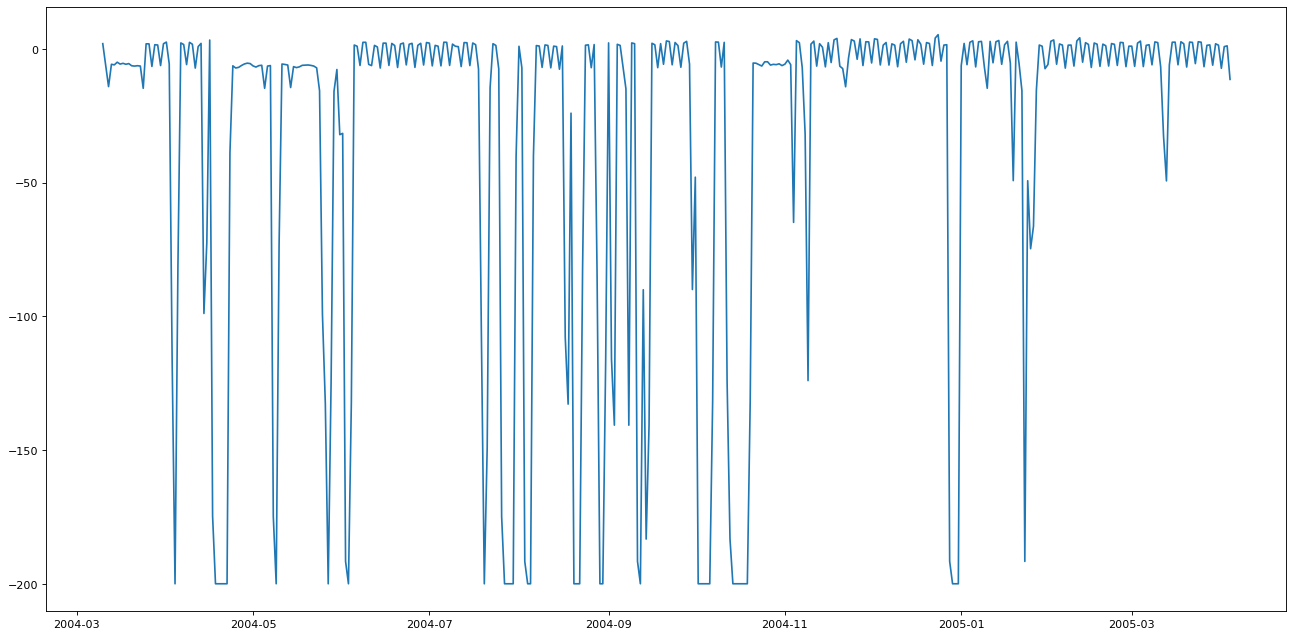

In [11]:
# plotting the reference sensors values

figure(figsize=(20, 10), dpi=80)
plt.plot(df_avg["Date"],df_avg["Carbon Monoxide (Reference)"])


This shows that certain days have outliers in concentration readings of CO.

In [12]:
# select only numeric-value columns from the DataFrame
df_nums = df_avg.select_dtypes(include = [np.number])

In [13]:
# replace any values < 0 with NaN (Not a Number)
df_positive = df_nums.where(lambda x: x >=0, np.nan)

In [14]:
# add the date column to DataFrame with only positive values
df_positive["Date"] = df_avg["Date"]

In [15]:
# display data with NaN values
df_positive

,Carbon Monoxide (Reference),Carbon Monoxide (Sensor 1),Non Metanic HydroCarbons (Reference),Benzene (Reference),Non Metanic HydroCarbons (Sensor 2),Nitrogen Oxides (Reference),Nitrogen Oxides (Sensor 3),Nitrogen Dioxide (Reference),Nitrogen Dioxide (Sensor 4),Ozone (Trioxygen) (Sensor 5),Temperature (Celsius),Relative Humidity (%),Absolute Humidity,Date
0,1.966667,1316.500000,86.500000,8.460790,912.250000,132.000000,1167.250000,108.833333,1545.333333,1096.041667,12.020833,54.883334,0.765626,2004-03-10
1,NaN,1244.062500,104.500000,7.989058,851.802083,130.041667,1277.187500,87.375000,1522.697917,885.031250,9.833333,64.069791,0.775768,2004-03-11
2,NaN,1281.562500,141.500000,12.129509,1008.229167,142.583333,1101.718750,89.916667,1627.218750,1084.218750,11.292708,51.107292,0.663102,2004-03-12
3,NaN,1330.555556,139.250000,10.922887,992.822917,168.416667,993.159722,105.583333,1595.621528,1245.781250,12.866319,51.530903,0.732294,2004-03-13
4,NaN,1360.927083,116.958333,9.631442,943.854167,132.166667,1001.104167,97.458333,1602.187500,1234.177083,16.016667,48.843750,0.849674,2004-03-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,1.387500,1007.989583,NaN,5.226496,749.302083,184.991667,795.479167,100.637500,1176.468750,763.770833,17.554167,50.092708,0.951922,2005-03-31
387,NaN,903.142361,NaN,3.416610,662.871528,161.766667,946.732639,107.208333,943.006944,523.868056,15.919792,35.959722,0.636536,2005-04-01
388,0.854167,890.895833,NaN,2.527522,616.197917,142.370833,991.697917,100.079167,864.260417,481.614583,15.489583,32.213542,0.546161,2005-04-02
389,1.141667,981.152778,NaN,4.318307,714.579861,167.662500,855.965278,111.137500,985.111111,716.972222,18.381250,33.686458,0.617579,2005-04-03


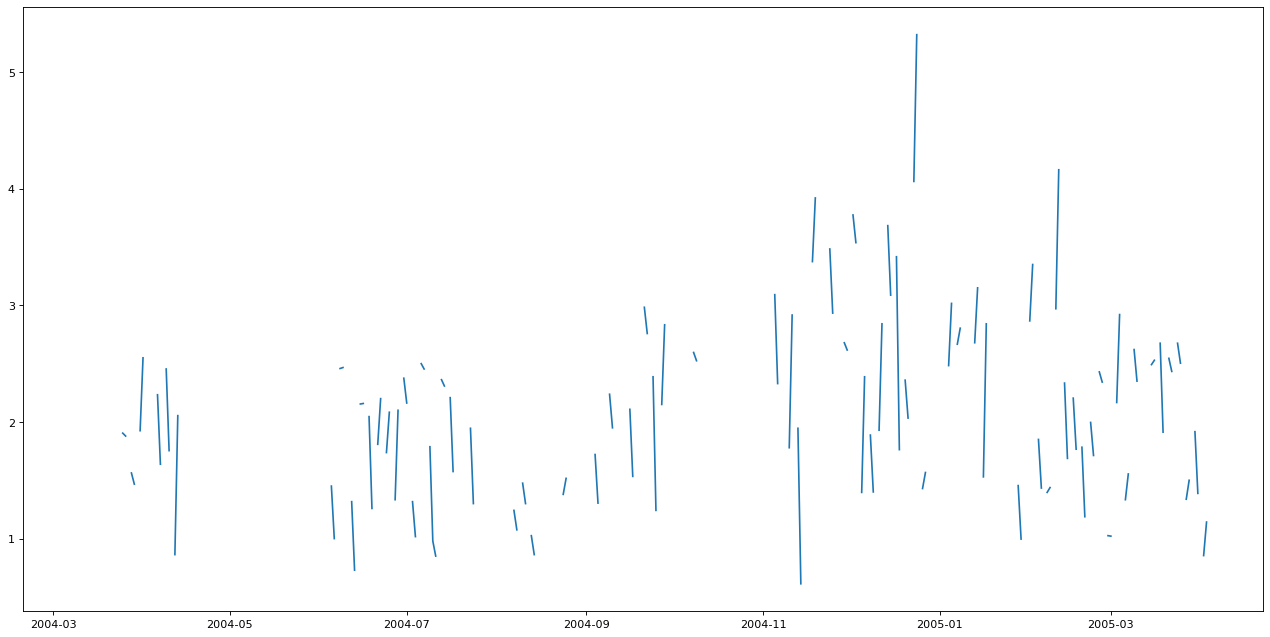

In [16]:
# Graph of Carbon Monoxide reference values greater than 0

figure(figsize=(20, 10), dpi=80)
plt.plot(df_positive["Date"],df_positive["Carbon Monoxide (Reference)"])

1. Graph values are filtered to be >= 0
2. Gaps represent where values are < 0 and NaN in the DataFrame
3. The range of values is smaller from 0 - 6

In [17]:
# Using the forward fill method to replace NaN with previous positive-numeric value
# limited to 7 days of fill to close smaller gaps in graph

df_positive = df_positive.fillna(method = 'ffill', limit = 7)

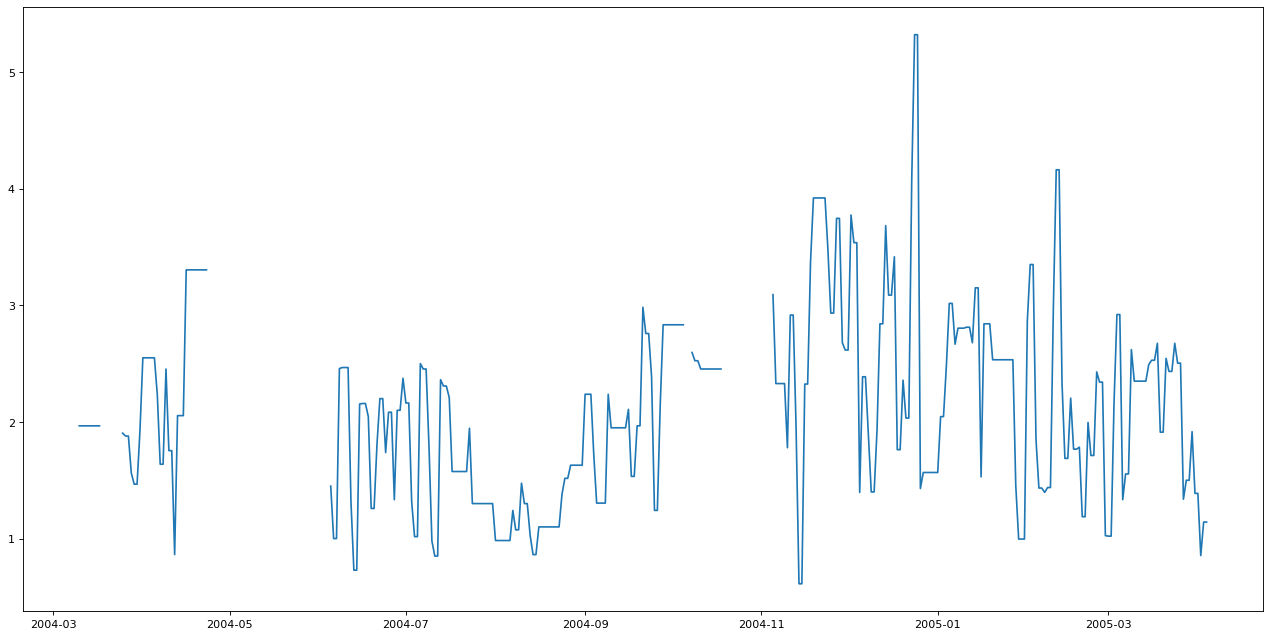

In [18]:
# Plot readings for fixed station reference readings for Carbon Monoxide

figure(figsize=(20, 10), dpi=80)
plt.plot(df_positive["Date"],df_positive["Carbon Monoxide (Reference)"])

1. Small gaps in data can be seen by horizontal lines
2. Values below zero for more than a week are seen by the gaps in the graph


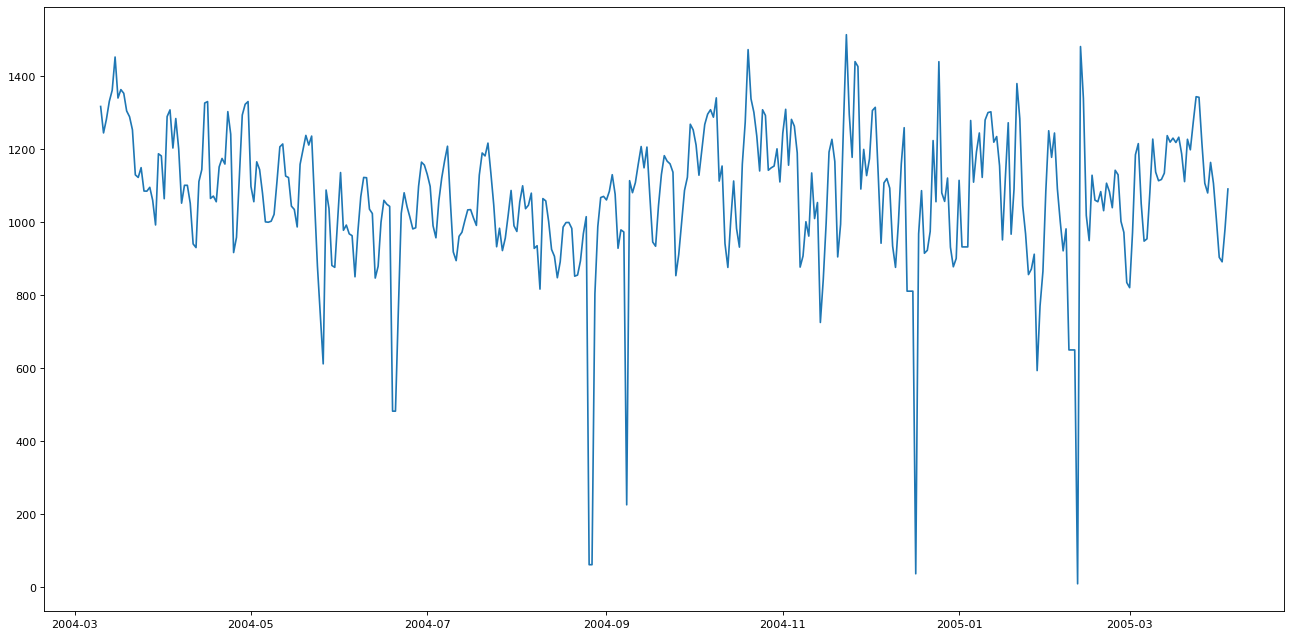

In [19]:
# Plot readings of low-cost sensor for Carbon Monoxide

figure(figsize=(20, 10), dpi=80)
plt.plot(df_positive["Date"],df_positive["Carbon Monoxide (Sensor 1)"])

1. Readings tend to range between 800 - 1400
2. There are a few days where readings are much below the range (outliers)
3. As such, the sensor could be readjusted on said days in conjunction with modifying algorithms to account for factors influencing the outliers.

<AxesSubplot:xlabel='Date'>

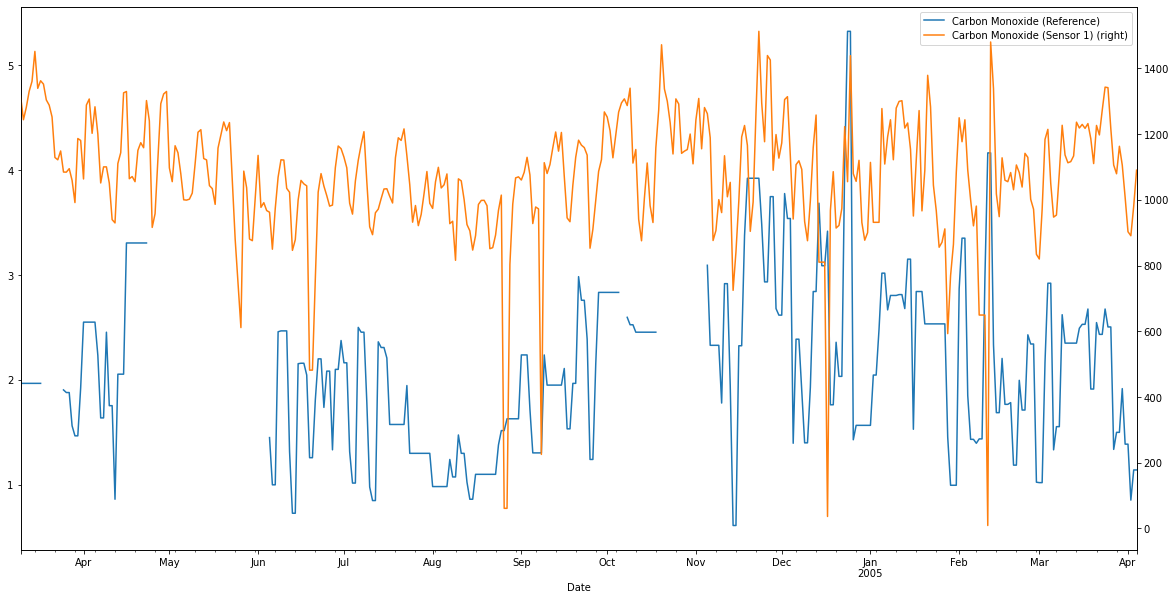

In [20]:
# plot comparing reference readings with the low-cost sensor readings

df_positive.plot(x="Date",y=["Carbon Monoxide (Reference)","Carbon Monoxide (Sensor 1)"],secondary_y=["Carbon Monoxide (Sensor 1)"],figsize=(20,10))

The pattern followed by the low-cost sensor is somewhat similar to the reference sensor

<AxesSubplot:xlabel='Date'>

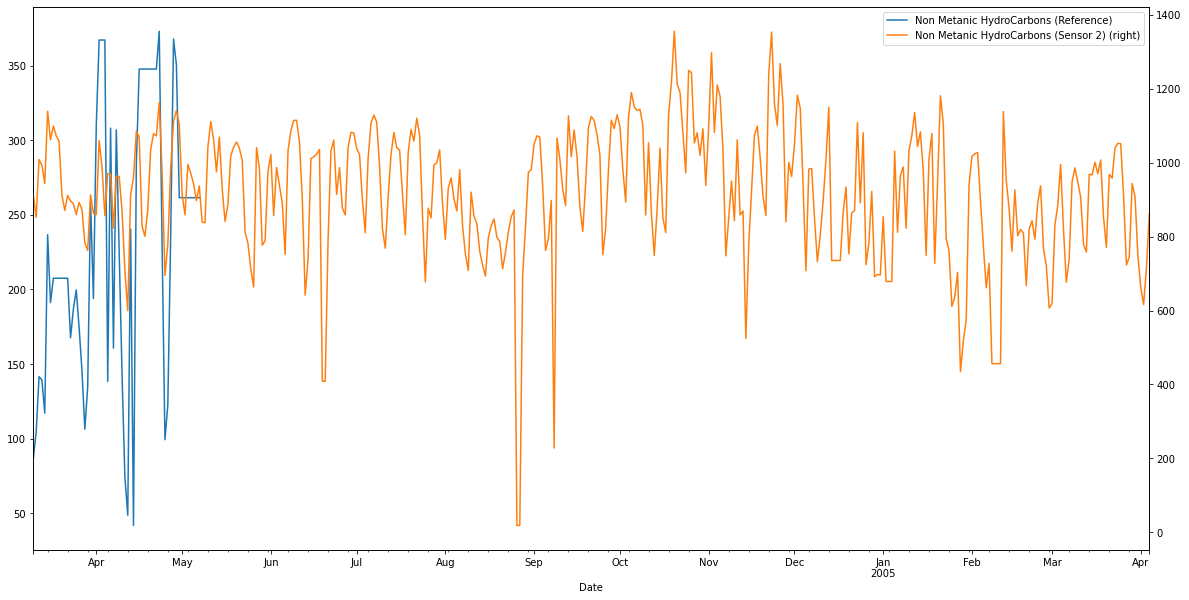

In [21]:
# comparison graph for Non Metanic HydroCarbons

df_positive.plot(x="Date",y=['Non Metanic HydroCarbons (Reference)','Non Metanic HydroCarbons (Sensor 2)'],secondary_y=['Non Metanic HydroCarbons (Sensor 2)'],figsize=(20,10))

1. A lack of positive values after May 2004 suggests a recalibration necessary for the reference sensor.
2. The range of of values from the low cost sensor seems to be widening from October 2004

<AxesSubplot:xlabel='Date'>

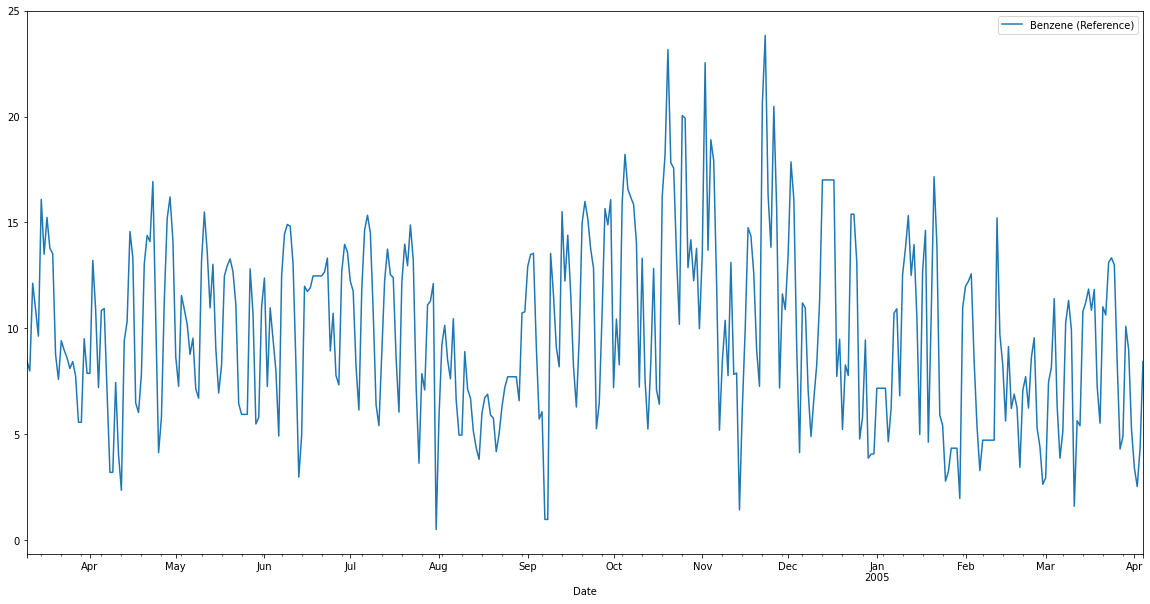

In [22]:
df_positive.plot(x="Date", y ='Benzene (Reference)', figsize=(20,10))

<AxesSubplot:xlabel='Date'>

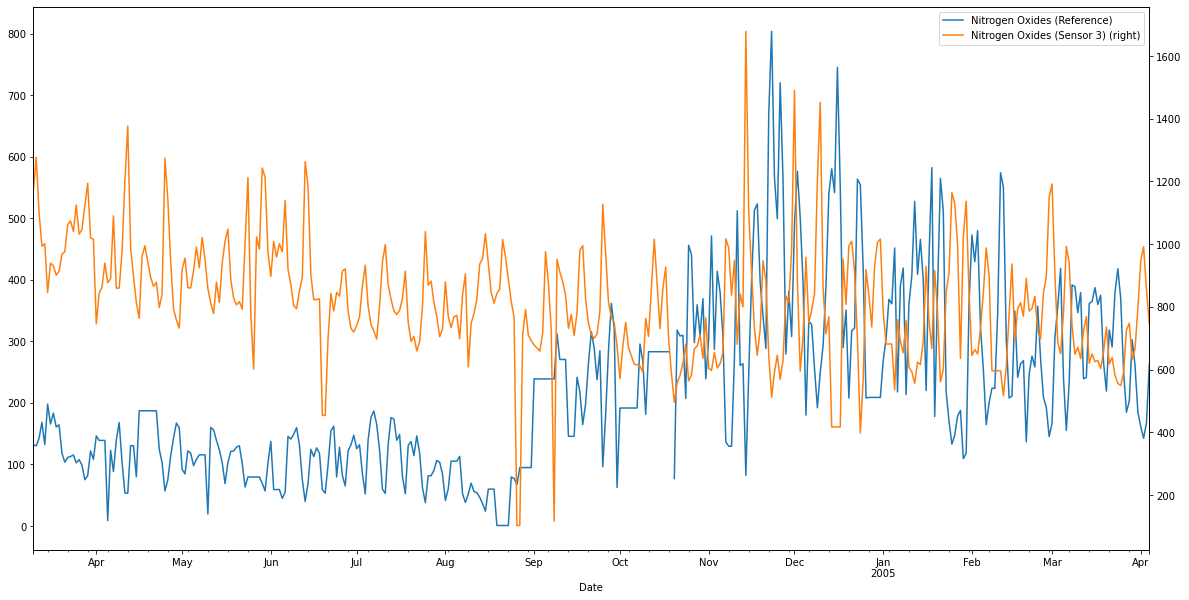

In [23]:
# comparison graphs for Nitrogen Oxides

df_positive.plot(x="Date",y=['Nitrogen Oxides (Reference)','Nitrogen Oxides (Sensor 3)'],secondary_y=['Nitrogen Oxides (Sensor 3)'],figsize=(20,10))

1. After September 2004, the reference sensor's values start to increase in measure and volatility.
2. After November 2004, The low-cost sensor maintains a steady range but increases in volatility.

<AxesSubplot:xlabel='Date'>

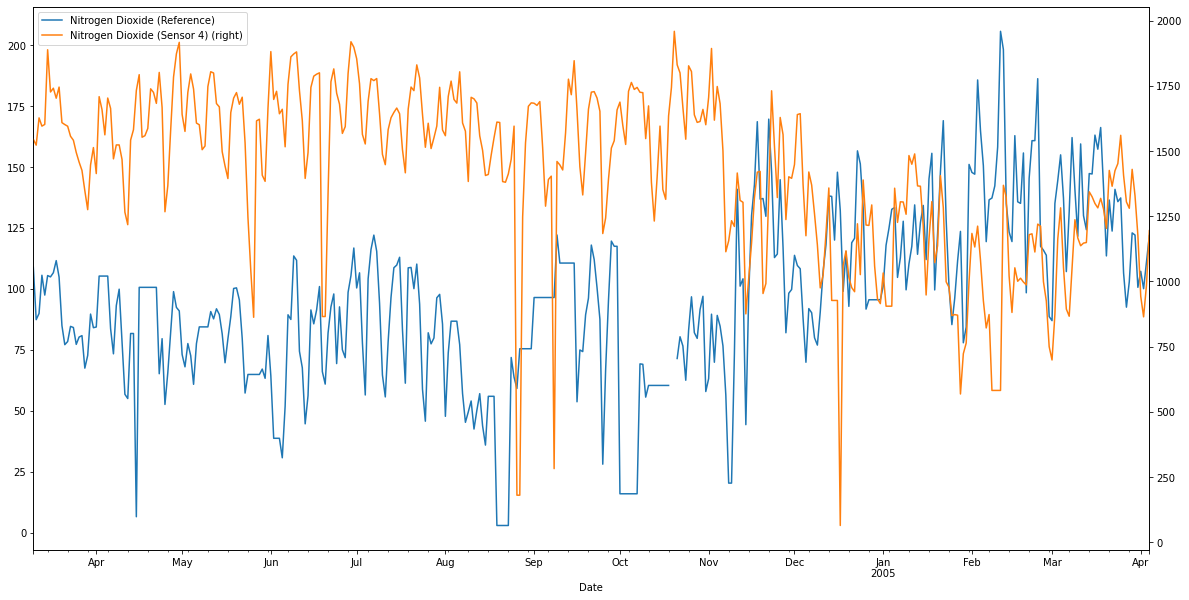

In [24]:
# Comparison graphs for Nitrogen Dioxide Readings

df_positive.plot(x="Date",y=['Nitrogen Dioxide (Reference)','Nitrogen Dioxide (Sensor 4)'],secondary_y=['Nitrogen Dioxide (Sensor 4)'],figsize=(20,10))

1. Both graphs maintain similar behavior in value until Nov 2004.
2. From November 2004, The reference sensor's values start to increase in measure while the low-cost sensor decreases in measure.
3. The reference sensor's changes are drastic relative to the low-cost sensor when considering the scale of values.
4. An increase in reference sensor and decrease in low-cost sensor suggests an external factor influencing the method of measuring chemical concentration.
5. The low-cost sensor reflects a relatively stable range compared to the reference sensor.

<AxesSubplot:xlabel='Date'>

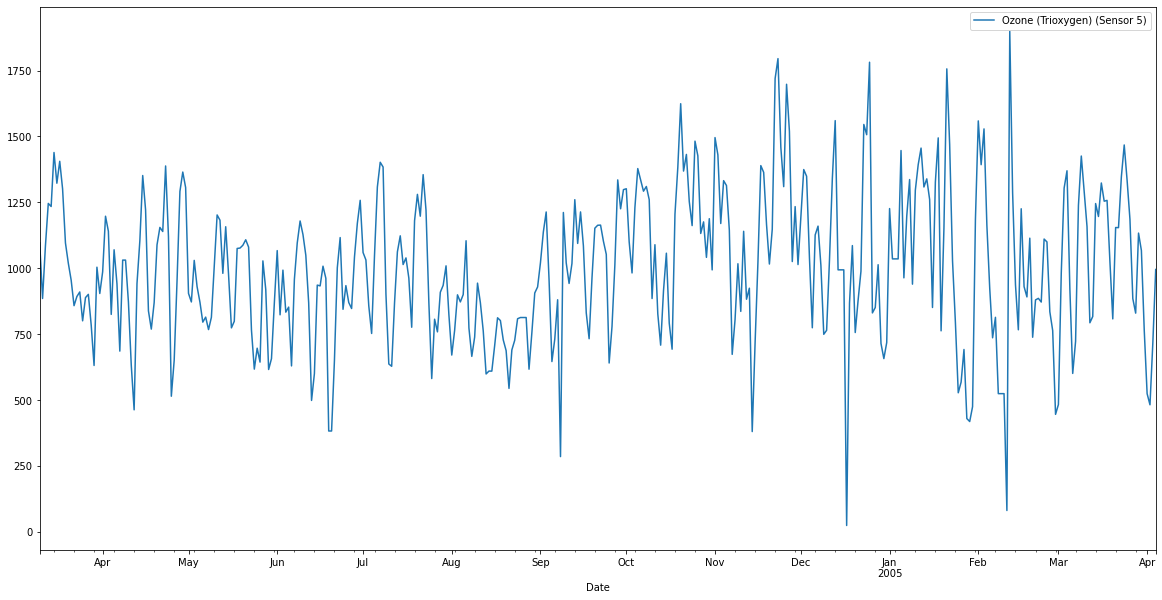

In [25]:
df_positive.plot(x="Date",y="Ozone (Trioxygen) (Sensor 5)",figsize=(20,10))

In [26]:
df_positive["Absolute Humidity"] = df_positive["Absolute Humidity"] * 100

In [27]:
df_positive["Absolute Humidity"]

0      76.562646
1      77.576778
2      66.310243
3      73.229404
4      84.967403
         ...    
386    95.192241
387    63.653618
388    54.616100
389    61.757936
390    72.478020
Name: Absolute Humidity, Length: 391, dtype: float64

In [28]:
df_positive

,Carbon Monoxide (Reference),Carbon Monoxide (Sensor 1),Non Metanic HydroCarbons (Reference),Benzene (Reference),Non Metanic HydroCarbons (Sensor 2),Nitrogen Oxides (Reference),Nitrogen Oxides (Sensor 3),Nitrogen Dioxide (Reference),Nitrogen Dioxide (Sensor 4),Ozone (Trioxygen) (Sensor 5),Temperature (Celsius),Relative Humidity (%),Absolute Humidity,Date
0,1.966667,1316.500000,86.500000,8.460790,912.250000,132.000000,1167.250000,108.833333,1545.333333,1096.041667,12.020833,54.883334,76.562646,2004-03-10
1,1.966667,1244.062500,104.500000,7.989058,851.802083,130.041667,1277.187500,87.375000,1522.697917,885.031250,9.833333,64.069791,77.576778,2004-03-11
2,1.966667,1281.562500,141.500000,12.129509,1008.229167,142.583333,1101.718750,89.916667,1627.218750,1084.218750,11.292708,51.107292,66.310243,2004-03-12
3,1.966667,1330.555556,139.250000,10.922887,992.822917,168.416667,993.159722,105.583333,1595.621528,1245.781250,12.866319,51.530903,73.229404,2004-03-13
4,1.966667,1360.927083,116.958333,9.631442,943.854167,132.166667,1001.104167,97.458333,1602.187500,1234.177083,16.016667,48.843750,84.967403,2004-03-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,1.387500,1007.989583,NaN,5.226496,749.302083,184.991667,795.479167,100.637500,1176.468750,763.770833,17.554167,50.092708,95.192241,2005-03-31
387,1.387500,903.142361,NaN,3.416610,662.871528,161.766667,946.732639,107.208333,943.006944,523.868056,15.919792,35.959722,63.653618,2005-04-01
388,0.854167,890.895833,NaN,2.527522,616.197917,142.370833,991.697917,100.079167,864.260417,481.614583,15.489583,32.213542,54.616100,2005-04-02
389,1.141667,981.152778,NaN,4.318307,714.579861,167.662500,855.965278,111.137500,985.111111,716.972222,18.381250,33.686458,61.757936,2005-04-03


<AxesSubplot:xlabel='Date'>

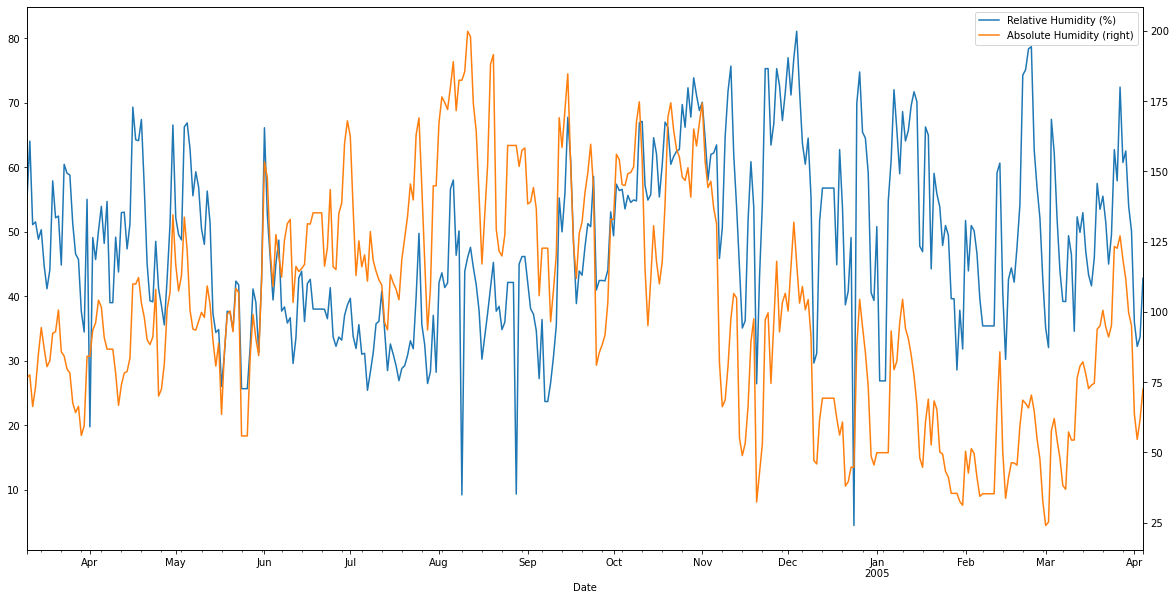

In [29]:
df_positive.plot(x="Date",y=['Relative Humidity (%)','Absolute Humidity'],secondary_y=['Absolute Humidity'],figsize=(20,10))

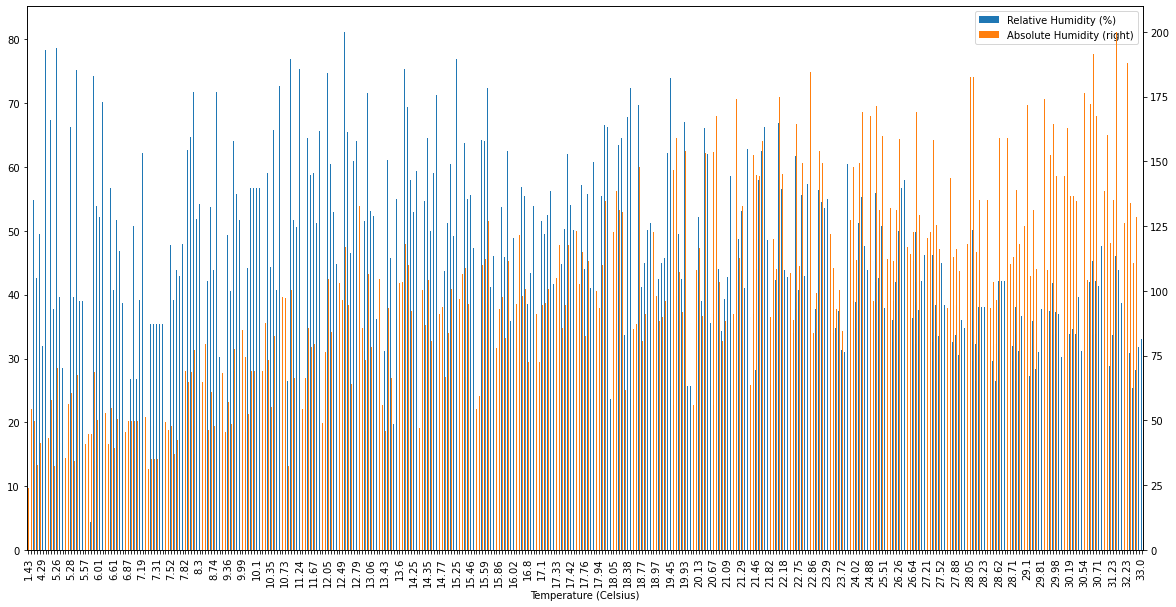

In [44]:
# round temperature column to 2 decimal places and display tick markings for every 5th value on the x-axis

# round and sort Temperature column for ordered x-axis
df_positive["Temperature (Celsius)"] = df_positive["Temperature (Celsius)"].round(decimals = 2)
df_positive2 = df_positive.sort_values("Temperature (Celsius)",ascending=True)

# Alternate tick marks for every 5th value
ax = df_positive2.plot(kind='bar',x='Temperature (Celsius)',y=['Relative Humidity (%)','Absolute Humidity'],secondary_y=['Absolute Humidity'],figsize=(20,10))
xticks = ax.xaxis.get_major_ticks()
for i,tick in enumerate(xticks):
    if i%5 != 0:
        tick.label1.set_visible(False)
plt.show()

<AxesSubplot:>

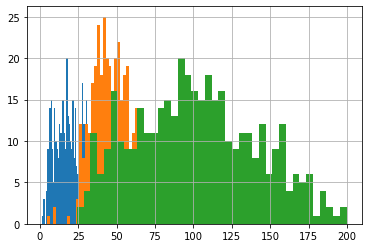

In [45]:
# The distribution of values for temperature and humidity

df_positive["Temperature (Celsius)"].hist(bins=40)
df_positive["Relative Humidity (%)"].hist(bins=40)
df_positive["Absolute Humidity"].hist(bins=40)

In [32]:
df_positive.describe()

,Carbon Monoxide (Reference),Carbon Monoxide (Sensor 1),Non Metanic HydroCarbons (Reference),Benzene (Reference),Non Metanic HydroCarbons (Sensor 2),Nitrogen Oxides (Reference),Nitrogen Oxides (Sensor 3),Nitrogen Dioxide (Reference),Nitrogen Dioxide (Sensor 4),Ozone (Trioxygen) (Sensor 5),Temperature (Celsius),Relative Humidity (%),Absolute Humidity
count,323.000000,391.000000,59.000000,391.000000,391.000000,390.000000,391.000000,389.000000,391.000000,391.000000,391.000000,391.000000,391.000000
mean,2.101238,1070.316613,229.036017,9.861216,915.220006,216.689079,815.333195,95.150296,1416.324018,1000.495412,17.977678,48.153312,101.536501
std,0.799392,194.184806,92.079439,4.225522,178.092629,143.478991,189.837807,34.771401,322.538162,284.007194,8.039361,13.575608,39.647357
min,0.612500,8.833333,41.750000,0.501277,18.552083,0.666667,102.520833,3.000000,64.229167,23.541667,1.430208,4.436111,24.000771
25%,1.466667,977.875000,153.041667,6.530996,811.074653,111.437500,692.104167,74.958333,1220.562500,809.989583,11.313542,37.903819,69.274751
50%,2.045833,1084.500000,229.291667,9.509991,930.003472,184.045833,806.194444,95.541667,1489.079861,1001.465278,17.760764,47.352431,99.675895
75%,2.533333,1187.984375,307.458333,12.976524,1040.645833,290.601042,930.678819,115.375000,1666.032986,1192.015625,24.685590,57.444792,131.265045
max,5.320833,1513.208333,372.916667,23.840736,1355.104167,803.791667,1678.687500,205.587500,1959.208333,1898.965278,32.997917,81.104167,199.781915


<AxesSubplot:xlabel='Temperature (Celsius)', ylabel='Relative Humidity (%)'>

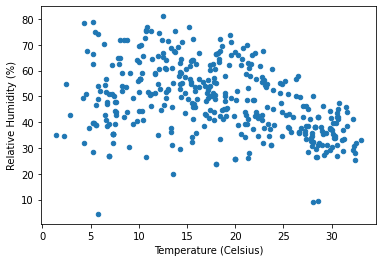

In [33]:
df_positive.plot.scatter(x= "Temperature (Celsius)",y="Relative Humidity (%)")

<AxesSubplot:xlabel='Temperature (Celsius)', ylabel='Absolute Humidity'>

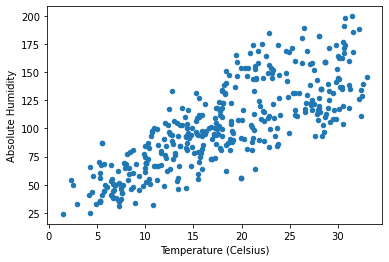

In [34]:
df_positive.plot.scatter(x= "Temperature (Celsius)",y="Absolute Humidity")

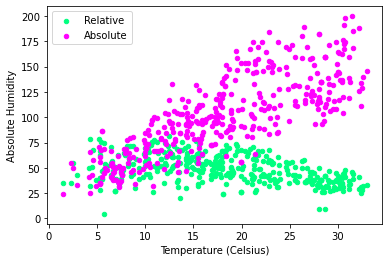

In [35]:
ax = df_positive.plot(kind="scatter", x='Temperature (Celsius)', y="Relative Humidity (%)", color = "springgreen",label="Relative")
df_positive.plot(kind="scatter",x='Temperature (Celsius)', y="Absolute Humidity",color = "magenta", ax=ax, label="Absolute")
ax.legend()

1. Absolute Humidity is seen to rise along with temperature while relative humidity is stable.
2. The graphs suggest temperature and humidity as stable forces which can be factored into models measuring and predicting chemical concentrations.